In [1]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.8 MB/s eta 0:00:00


In [4]:
!pip install matplotlib

In [15]:
import mtcnn
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

#print version
print(mtcnn.__version__)

0.1.0


Function to draw image with detected objects

In [9]:
#px = pyplot.imread("test1.jpg")
#ax = pyplot.gca()
#print(px)

In [30]:
# Function to draw image with detected objects
def draw_image_with_boxes(filename, model_result):
  #load the image
  data = pyplot.imread(filename)
  # Plot the image
  pyplot.imshow(data)
  # get the context for drawing boxes
  ax = pyplot.gca()
  # plot each box
  for result in model_result:
    # get x, y coordinates
    x, y, width, height = result['box']
    # create the rectangular shape
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)

    # Draw dots/ circle around the eyes, nose, mouth
    for key, value in result['keypoints'].items():
      # create and draw dot
      dot = Circle(value, radius=2, color="red")
      #print(dot)
      ax.add_patch(dot)
  # Show the dot in the plot
  pyplot.show()

  # Draw dots/ circle around the eyes, nose, mouth
  #for key, value in model_result['keypoints'].items():
    ## create and draw dot
    #dot = Circle(value, radius=2, color="red")
    #ax.add_patch(dot)

1/1 [==============================] - 0s 170ms/step


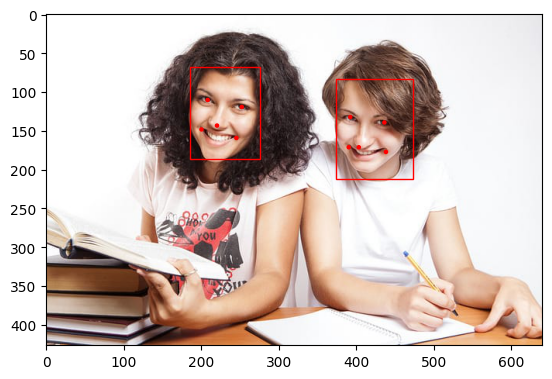

In [32]:
filename = "test1.jpg"

# load image from file
pixels = pyplot.imread(filename)

# Create the detector using default weights
detector = MTCNN()

# Detects faces in the image
faces = detector.detect_faces(pixels)

#print(faces)

# display faces on the original image
draw_image_with_boxes(filename, faces)

In [33]:
# Extract and plot each detected face seperately from the image

# Function to draw each face seperately
def draw_faces(filename, model_result):
  # load the image
  data = pyplot.imread(filename)
  # plot each face as a subplot
  for face in range(len(model_result)):
    # Get the cordinates
    x1, y1, width, height = model_result[face]["box"]
    x2, y2 = x1 + width, y1 + height

    # define subplot
    pyplot.subplot(1, len(model_result), face + 1)
    pyplot.axis("off")

    # Plot face
    pyplot.imshow(data[y1: y2, x1: x2])

  #show the plot
  pyplot.show()



1/1 [==============================] - 0s 275ms/step


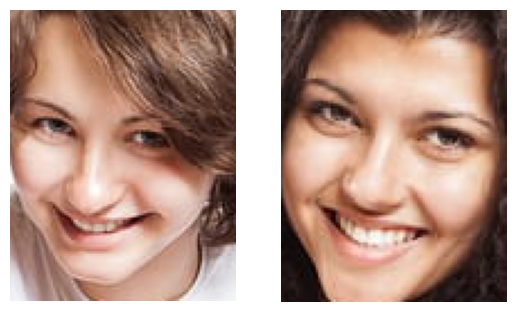

In [34]:
filename = "test1.jpg"

# load image from file
pixels = pyplot.imread(filename)
# instance of MTCNN and create the detector using the MTCNN default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)